In [1]:
!pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import os
import pickle
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB

#### Import Dataset

In [2]:
data_path = '/content/dataset'
# data_path = '...\Flask-server\dataset'

labels = []
tokens = []
titles = []

for f in os.listdir(data_path):
    full_path = os.path.join(data_path, f)
    if os.path.isfile(full_path):
        titles.append(f.split('.')[0])
        with open(full_path, 'r', encoding='utf8', errors='ignore') as infile:
            for line in infile:
                tokens.append(line.strip())
                labels.append(len(titles) - 1)

df = pd.DataFrame(list(zip(tokens, labels)), columns=['sent', 'label'])

In [3]:
df

,sent,label
0,Pengembangan memerlukan pemahaman mendalam ten...,0
1,Machine learning adalah sub-bidang yang fokus ...,0
2,Deep learning menggunakan jaringan saraf dalam...,0
3,Natural Language Processing (NLP) adalah caban...,0
4,Penggunaan reinforcement learning memungkinkan...,0
...,...,...
1783,Babel adalah transpiler JavaScript yang memung...,6
1784,Babel mengonversi kode modern JavaScript (ES6+...,6
1785,Babel sering digunakan bersama Webpack untuk m...,6
1786,Babel menyediakan plugin dan preset untuk meng...,6


In [4]:
titles

['ai', 'devops', 'gamedev', 'ios', 'android', 'backend', 'frontend']

In [5]:
df.sample(20)

,sent,label
387,memfokuskan pada peningkatan komunikasi antara...,1
1402,Pengembang harus dapat mengatasi berbagai tant...,5
887,Menguasai pemrograman memungkinkan Anda untuk...,3
752,Cocos2d-x sering digunakan dalam pengembangan ...,2
1787,Babel mempermudah pengembangan frontend dengan...,6
1300,Pembangunan sering mencakup pembuatan dan peng...,5
183,"Model attention dalam NLP, seperti BERT, memun...",0
1603,Penerapan prinsip desain visual yang baik dapa...,6
1231,Java sering digunakan untuk proyek yang memerl...,4
1769,Angular memiliki CLI (Command Line Interface) ...,6


#### Data Cleaning

In [6]:
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

stop_factory = StopWordRemoverFactory()
stop_words = stop_factory.get_stop_words()

In [7]:
def preprocess_text(text):
    cleaned_text = " ".join([stemmer.stem(word) for word in re.sub("[^a-zA-Z]", " ", text).split() if word.lower() not in stop_words])
    return cleaned_text.lower()

df['cleaned'] = df['sent'].apply(preprocess_text)


In [8]:
df

,sent,label,cleaned
0,Pengembangan memerlukan pemahaman mendalam ten...,0,kembang paham dalam algoritma machine learning...
1,Machine learning adalah sub-bidang yang fokus ...,0,machine learning sub bidang fokus kembang algo...
2,Deep learning menggunakan jaringan saraf dalam...,0,deep learning jaring saraf tangan data komplek...
3,Natural Language Processing (NLP) adalah caban...,0,natural language processing nlp cabang fokus p...
4,Penggunaan reinforcement learning memungkinkan...,0,guna reinforcement learning ajar interaksi lin...
...,...,...,...
1783,Babel adalah transpiler JavaScript yang memung...,6,babel transpiler javascript guna sintaks fitur...
1784,Babel mengonversi kode modern JavaScript (ES6+...,6,babel konversi kode modern javascript es versi...
1785,Babel sering digunakan bersama Webpack untuk m...,6,babel webpack proses kode javascript kompatibi...
1786,Babel menyediakan plugin dan preset untuk meng...,6,babel sedia plugin preset kelola fitur javascr...


In [9]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

tfidf = TfidfVectorizer()

X_tfidf = tfidf.fit_transform(df['cleaned'])

selector = SelectKBest(chi2, k=1100)
X_selected = selector.fit_transform(X_tfidf, df['label'])

In [10]:
print(X_tfidf.shape)

(1788, 1725)


In [11]:
print(X_selected.shape)

(1788, 1100)


label
0    264
4    262
5    258
2    256
6    255
3    247
1    246
Name: count, dtype: int64


<ipython-input-12-48ad34a7fe06>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


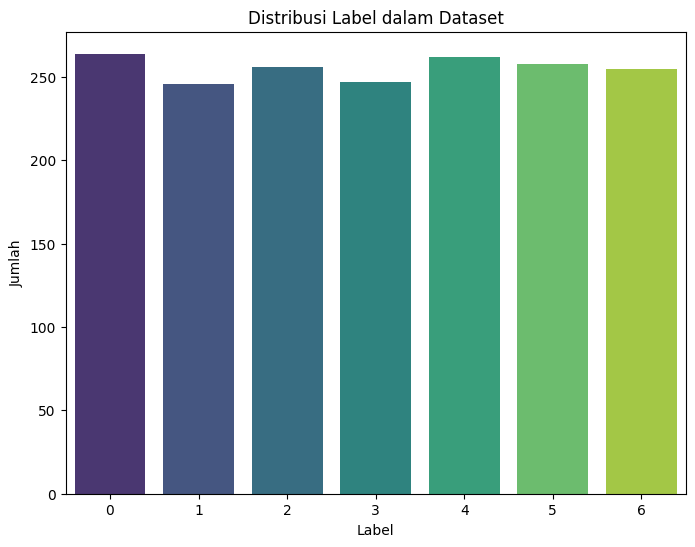

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memeriksa distribusi label
label_counts = df['label'].value_counts()
print(label_counts)

# Visualisasi distribusi label
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribusi Label dalam Dataset")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()


In [13]:
p_values = selector.pvalues_
scores = selector.scores_

feature_names = tfidf.get_feature_names_out()
feature_scores = sorted(zip(feature_names, scores, p_values), key=lambda x: x[1], reverse=True)

for feature, score, p_value in feature_scores[:200]:
    print(f"Feature: {feature}, Score: {score}, P-Value: {p_value}")


Feature: ios, Score: 167.36316179414445, P-Value: 1.629895109787355e-33
Feature: android, Score: 158.6885870582609, P-Value: 1.1224280199821263e-31
Feature: model, Score: 148.38095305325845, P-Value: 1.7016017514668165e-29
Feature: devops, Score: 138.97423687263606, P-Value: 1.6496994110453162e-27
Feature: game, Score: 138.26610812394884, P-Value: 2.3270188294550058e-27
Feature: situs, Score: 110.14918654577335, P-Value: 1.896917372037934e-21
Feature: backend, Score: 108.8995459473139, P-Value: 3.46477336033652e-21
Feature: website, Score: 107.17913552549271, P-Value: 7.937458351512545e-21
Feature: apple, Score: 104.4223747195647, P-Value: 2.99294472758995e-20
Feature: learning, Score: 104.11984037559348, P-Value: 3.461954494806935e-20
Feature: main, Score: 99.51856517568163, P-Value: 3.162187593635474e-19
Feature: lunak, Score: 93.46217459072727, P-Value: 5.777100166747801e-18
Feature: mobile, Score: 88.42917540651153, P-Value: 6.420784275380825e-17
Feature: otomatisasi, Score: 86.571

#### Data Training

In [14]:
x = df['cleaned']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [55]:
# LogisticRegression()
# MultinomialNB()
# BernoulliNB()

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('select', SelectKBest(chi2, k=1100)),
    ('classifier', BernoulliNB())
])

In [56]:
# pipeline.fit(df['cleaned'], df['label'])
model = pipeline.fit(x_train, y_train)
ytest = np.array(y_test)

In [57]:
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.80      0.97      0.88        58
           2       0.87      0.94      0.91        66
           3       0.89      0.72      0.80        65
           4       0.89      0.83      0.86        65
           5       0.80      0.91      0.85        58
           6       0.92      0.82      0.87        67

    accuracy                           0.88       447
   macro avg       0.88      0.88      0.87       447
weighted avg       0.88      0.88      0.88       447

[[65  0  0  0  1  2  0]
 [ 1 56  0  0  1  0  0]
 [ 0  2 62  1  0  1  0]
 [ 0  2  4 47  5  5  2]
 [ 0  0  3  4 54  2  2]
 [ 0  3  0  1  0 53  1]
 [ 0  7  2  0  0  3 55]]


In [58]:
def predict_text(text):
    cleaned_text = preprocess_text(text)
    prediction = pipeline.predict([cleaned_text])
    return titles[prediction[0]]

In [59]:
new_text = "saya tertarik untuk belajar di bidang pengembangan aplikasi google"
predicted_label = predict_text(new_text)
print(predicted_label)

ios


In [60]:
new_text = "bapak jokowi adalah idola saya. saya ingin bisa menjadi pemrogram yang bekerja di bidang server seperti bapak jokowi"
predicted_label = predict_text(new_text)
print(predicted_label)

backend


In [61]:
new_text = "saya mempunyai pengalaman mengerjakan project dengan bahasa python dan pernah membuat project prediksi harga"
predicted_label = predict_text(new_text)
print(predicted_label)

ai


In [62]:
new_text = "saya mempunyai pengalaman mengerjakan project css"
predicted_label = predict_text(new_text)
print(predicted_label)

frontend


In [63]:
df['label'].values

array([0, 0, 0, ..., 6, 6, 6])

In [64]:
cl = "bernoulli"
v = 2
titles = ['ai', 'devops', 'gamedev', 'ios', 'android', 'backend', 'frontend']
labels = df['label'].values

# Menyimpan model dengan format nama yang diberikan
filename = f'{cl}_model_v{v}_c{len(titles)}_e{int(len(labels)/len(titles))}.pickle'
with open(filename, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved as {filename}")

Model saved as bernoulli_model_v2_c7_e255.pickle


In [ ]:
filename = 'tfidf_vectorizer.pkl'
with open(filename, 'wb') as f:
    pickle.dump(tfidf, f)

print(f"Model saved as {filename}")

Model saved as tfidf_vectorizer.pkl


In [ ]:
filename = 'select_kbest.pkl'
with open(filename, 'wb') as f:
    pickle.dump(selector, f)

print(f"Model saved as {filename}")

Model saved as select_kbest.pkl
